In [22]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [33]:
ewa = yf.Ticker('EWA')
ewc = yf.Ticker('EWC')

In [34]:
ewa_df = ewa.history(start='2006-04-4', end='2012-04-09')
ewc_df = ewc.history(start='2006-04-4', end='2012-04-09')

In [35]:
# examien the dataframe
ewa_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2006-04-04 00:00:00-04:00,8.886091,8.996067,8.886091,8.960875,336600,0.0,0.0,0.0
2006-04-05 00:00:00-04:00,9.075251,9.163232,9.022463,9.114842,301800,0.0,0.0,0.0
2006-04-06 00:00:00-04:00,9.229217,9.242414,9.172029,9.229217,193200,0.0,0.0,0.0
2006-04-07 00:00:00-04:00,9.198421,9.229214,9.092844,9.145633,450100,0.0,0.0,0.0
2006-04-10 00:00:00-04:00,9.150034,9.158832,9.079649,9.123640,260100,0.0,0.0,0.0


In [36]:
# check null 
print(f" ewa data null count {ewa_df.isnull().sum()}")
print(f" ewc data null count {ewc_df.isnull().sum()}")

 ewa data null count Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64
 ewc data null count Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64


Text(0.5, 0, 'Time')

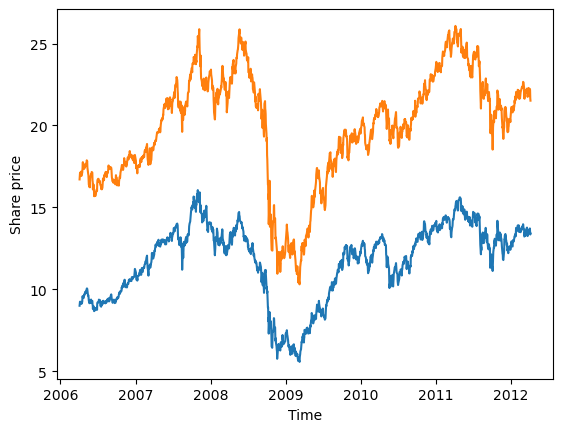

In [40]:
#plot gold vs uso stock prices High 
plt.plot(ewa_df.index, ewa_df['High'])
plt.plot(ewc_df.index, ewc_df['High'])
plt.ylabel(f'Share price')
plt.xlabel(f'Time')

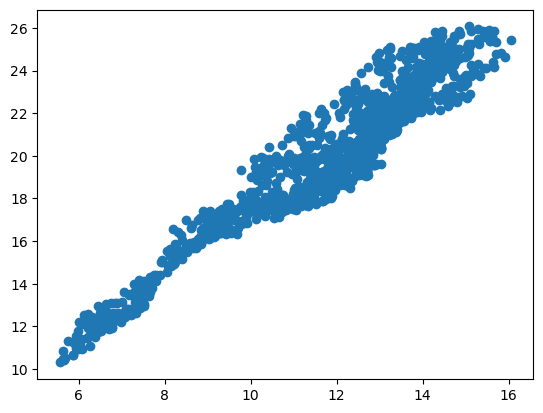

In [41]:
# plot gld vs uso prices 
plt.scatter(ewa_df.High, ewc_df.High)

In [47]:
# calculate the hedge ratio from linear regression
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# define X and y 
X = (ewa_df['High'].values).reshape(-1,1)
y = (ewc_df['High']).values

# Fit the model to the data
model.fit(X, y)



LinearRegression()

In [51]:
hedge_ratio = model.coef_
hedge_ratio

array([1.41486247])

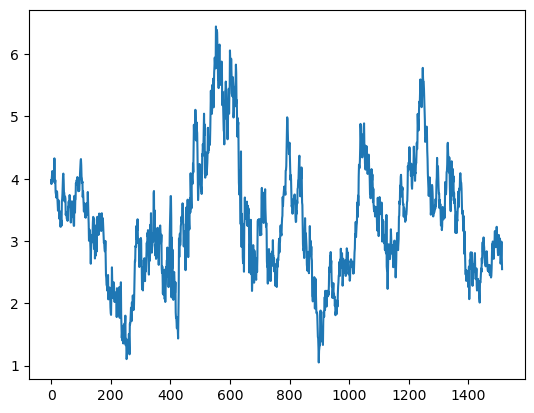

In [59]:
# mean reverting 
plt.plot(y - hedge_ratio * X.reshape(-1) )

In [60]:
# claim we obtain a mean reverting series 
mean_revert = y - hedge_ratio * X.reshape(-1)

In [64]:
# do CADF test 
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(mean_revert)

# Extract the ADF test statistic and p-value
adf_statistic, p_value = result[0], result[1]

print(result[0], result[1])

-3.2687653716311393 0.016333716636950744


In [66]:
result

(-3.2687653716311393,
 0.016333716636950744,
 2,
 1511,
 {'1%': -3.434685171403452,
  '5%': -2.863454705264858,
  '10%': -2.5677893640196907},
 -444.87590920369394)

In [68]:
"""We find that the ADF test statistic is about –3.26, certainly more negative than the critical value at the 95 percent level of –2.86. So we can 
reject the null hypothesis that λ is zero. In other words, EWA and EWC are cointegrating with 95 percent certainty.
"""

'We find that the ADF test statistic is about –3.26, certainly more negative than the critical value at the 95 percent level of –2.86. So we can \nreject the null hypothesis that λ is zero. In other words, EWA and EWC are cointegrating with 95 percent certainty.\n'

# Switch the role of X and y in regression 

In [69]:
model.fit(y.reshape(-1,1), X.reshape(-1) )

LinearRegression()

In [71]:
model.coef_

array([0.64911373])

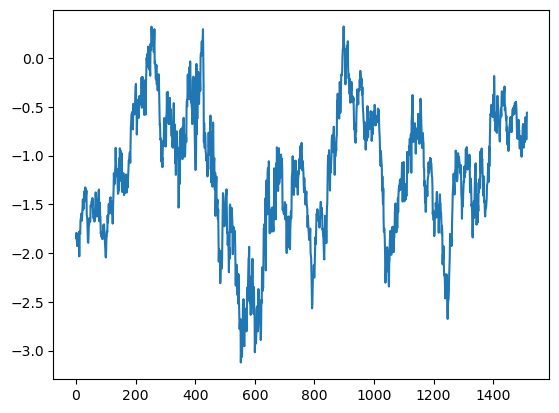

In [73]:
series =  X.reshape(-1) - 0.64911373 * y
plt.plot(series)

In [75]:
result = adfuller(series)
print(result)

(-3.280471306451674, 0.01577429696297118, 2, 1511, {'1%': -3.434685171403452, '5%': -2.863454705264858, '10%': -2.5677893640196907}, -1585.1964202578997)
